<a href="https://colab.research.google.com/github/Diaindah/xtb_md/blob/main/RMSD_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

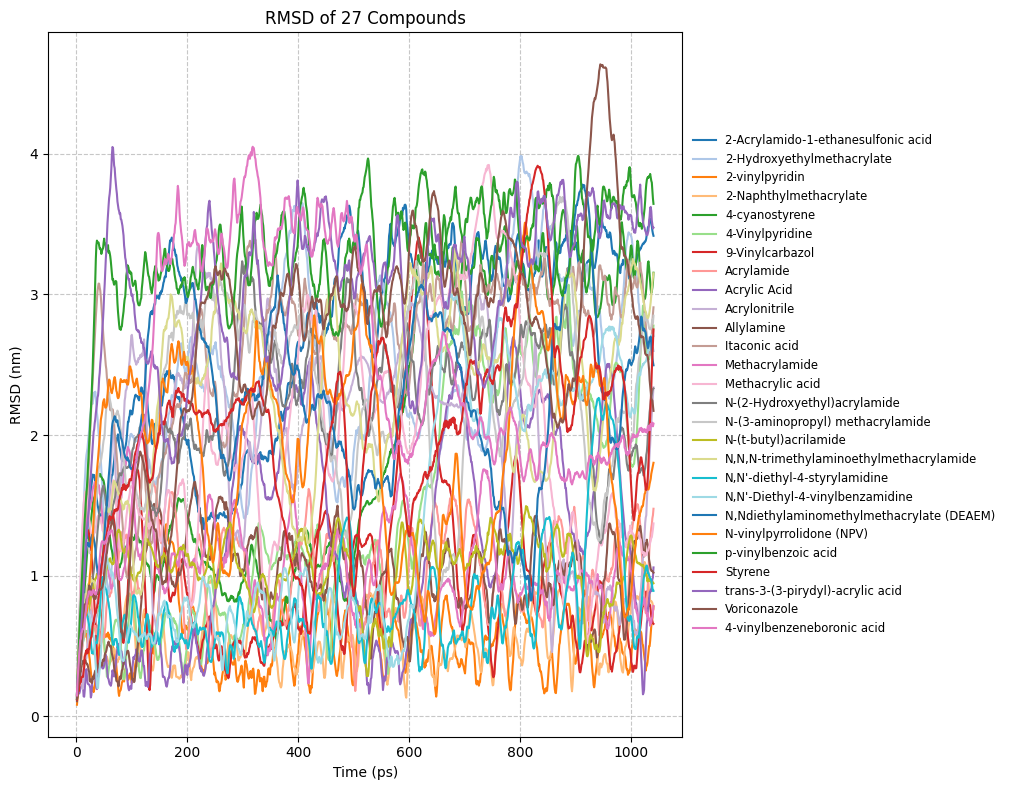

                                     Compound  Average RMSD (nm)
No                                                              
1          2-Acrylamido-1-ethanesulfonic acid           2.667695
2                  2-Hydroxyethylmethacrylate           2.456691
3                              2-vinylpyridin           0.524979
4                      2-Naphthylmethacrylate           0.564791
5                              4-cyanostyrene           2.045036
6                             4-Vinylpyridine           1.486591
7                             9-Vinylcarbazol           1.013778
8                                  Acrylamide           1.017507
9                                Acrylic Acid           1.246084
10                              Acrylonitrile           1.912814
11                                 Allylamine           0.974145
12                              Itaconic acid           2.661537
13                             Methacrylamide           1.073868
14                       

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Daftar nama senyawa sesuai urutan file 1.xvg hingga 27.xvg
compound_names = [
    "2-Acrylamido-1-ethanesulfonic acid", "2-Hydroxyethylmethacrylate", "2-vinylpyridin",
    "2-Naphthylmethacrylate", "4-cyanostyrene", "4-Vinylpyridine", "9-Vinylcarbazol",
    "Acrylamide", "Acrylic Acid", "Acrylonitrile", "Allylamine", "Itaconic acid",
    "Methacrylamide", "Methacrylic acid", "N-(2-Hydroxyethyl)acrylamide",
    "N-(3-aminopropyl) methacrylamide", "N-(t-butyl)acrilamide",
    "N,N,N-trimethylaminoethylmethacrylamide", "N,N'-diethyl-4-styrylamidine",
    "N,N'-Diethyl-4-vinylbenzamidine", "N,Ndiethylaminomethylmethacrylate (DEAEM)",
    "N-vinylpyrrolidone (NPV)", "p-vinylbenzoic acid", "Styrene",
    "trans-3-(3-pirydyl)-acrylic acid", "Voriconazole", "4-vinylbenzeneboronic acid"
]

# Interval waktu per frame dalam ps (contoh: 1 ps per frame)
time_per_frame = 1.0  # Sesuaikan jika interval berbeda

# Pewarnaan khusus menggunakan palet warna Matplotlib
colors = plt.get_cmap("tab20").colors + plt.get_cmap("tab10").colors  # Gabungan tab20 dan tab10 untuk 30 warna

# Buat figure tunggal
plt.figure(figsize=(12, 8))

# List untuk menyimpan rata-rata RMSD
average_rmsd = []

# Loop melalui setiap file dan plot
for i in range(len(compound_names)):
    file_name = f"{i+1}.xvg"  # Format nama file sesuai angka
    try:
        # Baca file .xvg (mengabaikan baris komentar dengan '@' atau '#')
        data = pd.read_csv(file_name, sep='\s+', comment='@', header=None)

        # Pastikan data dalam format numerik
        data = data.apply(pd.to_numeric, errors='coerce')

        # Pisahkan data waktu (frame) dan RMSD, pastikan nilai NaN diabaikan
        frames = data[0].dropna()  # Kolom pertama dianggap sebagai frame
        rmsd = data[1].dropna()    # Kolom kedua adalah nilai RMSD

        # Konversi frame ke waktu dengan mengalikan interval
        time = frames * time_per_frame

        # Plot tiap senyawa dalam satu figure dengan warna dan label berbeda
        plt.plot(time, rmsd, label=compound_names[i], color=colors[i])

        # Hitung rata-rata RMSD dan simpan
        average_rmsd.append(rmsd.mean())
    except FileNotFoundError:
        print(f"File {file_name} tidak ditemukan, pastikan semua file ada.")
    except Exception as e:
        print(f"Kesalahan saat memproses {file_name}: {e}")

# Atur label dan judul plot
plt.xlabel("Time (ps)")
plt.ylabel("RMSD (nm)")
plt.title("RMSD of 27 Compounds")
plt.xticks(fontsize=10)  # Ukuran font untuk sumbu x
plt.yticks(fontsize=10)  # Ukuran font untuk sumbu y

# Letakkan legenda di luar gambar
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize="small", frameon=False)

# Sesuaikan tampilan plot
plt.grid(visible=True, linestyle='--', alpha=0.7)  # Tambahkan grid
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Memberi ruang untuk legenda

# Simpan plot sebagai file PDF dengan resolusi 600 dpi
plt.savefig("hasil.pdf", format="pdf", dpi=600, bbox_inches="tight")

# Tampilkan plot
plt.show()

# Membuat tabel rata-rata RMSD
average_rmsd_df = pd.DataFrame({
    "Compound": compound_names,
    "Average RMSD (nm)": average_rmsd
})

# Menyisipkan nomor urut dari 1 ke 27
average_rmsd_df.index += 1
average_rmsd_df.index.name = 'No'

# Simpan tabel rata-rata RMSD ke dalam file Excel
average_rmsd_df.to_excel("rata2_rmsd.xlsx", index=True)

# Tampilkan tabel rata-rata RMSD
print(average_rmsd_df)
